In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

tit_df=pd.read_csv('./train.csv')
tit_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
print('\n ###학습 데이터 정보 ### \n')   # 데이터 컬럼 타입 확인
print(tit_df.info())


 ###학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
# 결측값 처리
tit_df['Age'].fillna(tit_df['Age'].mean(),inplace=True)
tit_df['Cabin'].fillna('N',inplace=True)
tit_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 값 개수', tit_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


In [24]:
print(' Sex 값 분포:\n',tit_df['Sex'].value_counts())
print('\n Cabin 값 분포:\n', tit_df['Cabin'].value_counts())
print('\n Embarked 값 분포:\n', tit_df['Embarked'].value_counts())
print(tit_df['Survived'].value_counts())

 Sex 값 분포:
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포:
 G6             4
C23 C25 C27    4
B96 B98        4
F33            3
E101           3
              ..
B101           1
B30            1
E68            1
E63            1
F E69          1
Name: Cabin, Length: 147, dtype: int64

 Embarked 값 분포:
 S    644
C    168
Q     77
Name: Embarked, dtype: int64
0    549
1    342
Name: Survived, dtype: int64


In [5]:
tit_df['Cabin']=tit_df['Cabin'].str[:1]
print(tit_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [6]:
tit_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

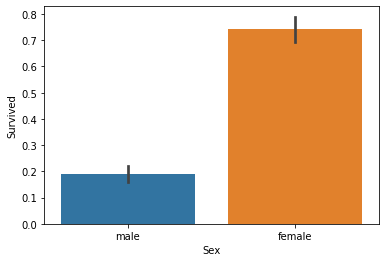

In [7]:
sns.barplot(x='Sex',y='Survived',data=tit_df)

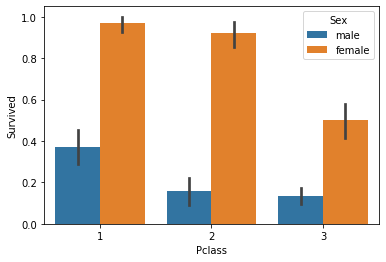

In [8]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=tit_df)

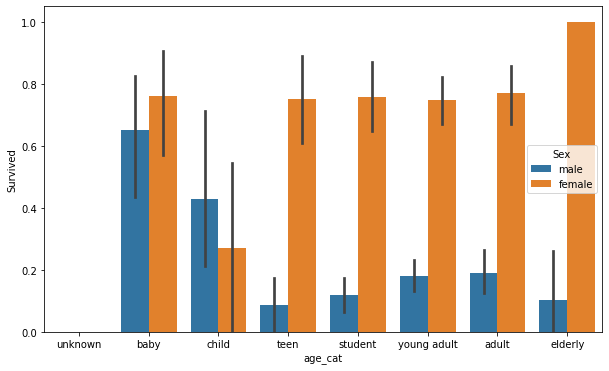

In [9]:
# 입력 age에 따라 구분 값을 반환하는 함수 설정, DataFrame 의 apply lambda 식에 사용
def get_category(age):
    cat=''
    if age <= -1 : cat='unknown'
    elif age <=5 : cat='baby'
    elif age <=12 : cat='child'
    elif age <= 18 : cat='teen'
    elif age <= 25 : cat='student'
    elif age <= 35 : cat='young adult'
    elif age <= 60 : cat='adult'
    else : cat = 'elderly'
    
    return cat

# 막대그래프의 크리 figure 를 더 크게 설정
plt.figure(figsize=(10,6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names=['unknown','baby','child','teen','student','young adult','adult','elderly']

# lambda 식에 위에서 생성한 get_category()함수를 반환값으로 지정
# get_category(x)는 입력값으로 'age' 칼럼 값을 받아서 해당하는 cat 반환
tit_df['age_cat']=tit_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='age_cat',y='Survived',hue='Sex',data=tit_df,order=group_names)
tit_df.drop('age_cat',axis=1,inplace=True)

In [10]:
# 저 선들은 뭘까..표준편차 : 평균으로 부터 얼마나 떨어져 있는가 ex) child 의 생존 분포는 엄청 차이남 

In [11]:
#  레이블 인코딩 적용 : 문자열을 숫자형으로 변환: 0부터 (카테고리 유형 수-1)
from sklearn import preprocessing

def encode_features(dataDF):  #  encode_features : fit,transform 을 한번에
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le= preprocessing.LabelEncoder()
        le= le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF
    
tit_df = encode_features(tit_df)
tit_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3


In [12]:
## transform_features()
#  Null 처리 함수 
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le= LabelEncoder()
        le= le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [13]:
from sklearn.preprocessing import LabelEncoder

# 원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출
tit_df = pd.read_csv('./train.csv')
y_tit_df = tit_df['Survived']    # 클래스 결정값 데이터 세트 만들기
X_tit_df = tit_df.drop('Survived',axis=1)  # 피처 데이터 세트 만들기

X_tit_df = transform_features(X_tit_df)  # 데이터 가공

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_tit_df,y_tit_df,test_size=0.2,random_state=11)


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, 랜덤포레스트, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도:{0:4f}'.format(accuracy_score(y_test,dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:4f}'.format(accuracy_score(y_test,rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도:{0:4f}'.format(accuracy_score(y_test,lr_pred)))


# 아직 최적화 작업을 수행하지 않았고, 데이터 양도 충분하지 않기 떄문에 어떤 알고리즘이 가장 성능이 좋다고 평가할 수 없음

DecisionTreeClassifier 정확도:0.787709
RandomForestClassifier 정확도:0.832402
LogisticRegression 정확도:0.865922


C:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
## 교차 검증으로 결정 트리 모델 평가 
# kfold 을 이용하여
from sklearn.model_selection import KFold

def exec_kfold(clf,folds=5):
    # 폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
    kfold =KFold(n_splits=5)
    scores=[]
    
    # KFold 교차 검증 수행
    for iter_count, (train_index,test_index) in enumerate(kfold.split(X_tit_df)) :
        # X_tit_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train,X_test = X_tit_df.values[train_index], X_tit_df.values[test_index]
        y_train,y_test = y_tit_df.values[train_index], y_tit_df.values[test_index]
        # Classifier 학습,예측, 정확도 계산
        dt_clf.fit(X_train,y_train)
        predictions = dt_clf.predict(X_test)
        accuracy = accuracy_score(y_test,predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도:{1:.4f}'.format(iter_count,accuracy))
    # 5개 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print('평균 정확도{0:.4f}'.format(mean_score))
# exec_kfold 호출
exec_kfold(dt_clf,folds=5)

교차 검증 0 정확도:0.7542
교차 검증 1 정확도:0.7809
교차 검증 2 정확도:0.7865
교차 검증 3 정확도:0.7697
교차 검증 4 정확도:0.8202
평균 정확도0.7823


In [17]:
# cross_val_score 을 이용하여 교차검증하기

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf,X_tit_df, y_tit_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도 {1:.4f}'.format(iter_count, accuracy))
    
print('평균 정확도{0:.4f}'.format(np.mean(scores)))

# StratifiedKFold 를 이용해 폴드 세트를 분할하기 때문에 위에 결과랑은 약간 다름 

교차 검증 0 정확도 0.7430
교차 검증 1 정확도 0.7765
교차 검증 2 정확도 0.7809
교차 검증 3 정확도 0.7753
교차 검증 4 정확도 0.8418
평균 정확도0.7835


In [18]:
# GridSearchCV 을 이용하여 최적 하이퍼 파라미터를 찾고 예측 성능 평가

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,4,10],
             'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}    # 숫자들이 임의로 정하는 건가?

grid_dclf= GridSearchCV(dt_clf,param_grid = parameters,scoring = 'accuracy',cv=5)
grid_dclf.fit(X_train,y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV 의 최적 하이퍼 파라미터로 학습된 Estimator 로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test,dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy))   # p.117 이랑 무슨 차이?


GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8715


C:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [19]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit() 메서드는 아무것도 학습하지 않음
    def fit(self,X,y=None):
        pass
    # predict() 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측함
    def predict(self,X):
        pred = np.zeros((X.shape[0],1))
        for i in range (X.shape[0]):
            if X['Sex'].iloc[i]==1:
                pred[i] = 0
            else:
                pred[i] = 1
                
            return pred


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
tit_df = pd.read_csv('train.csv')
y_tit_df = tit_df['Survived']
X_tit_df = tit_df.drop('Survived',axis=1)
X_tit_df = transform_features(X_tit_df)
X_train,X_test,y_train,y_test=train_test_split(X_tit_df,y_tit_df,test_size=0.2,random_state=0)

# 위에서 생성한 Dummy Classifier 를 이용해 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train,y_train)

mypredictions= myclf.predict(X_test)
print('Dummy Classifier 의 정확도는:{0:.4f}'.format(accuracy_score(y_test,mypredictions)))

Dummy Classifier 의 정확도는:0.6145
